### Testing on a sample image

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

ASSETS_DIRECTORY = "assets"

plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

/home/bharathraj/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
brick = "../PV01/PV01_Rooftop_Brick"
flatConcrete = "../PV01/PV01_Rooftop_FlatConcrete"
steelTile = "../PV01/PV01_Rooftop_SteelTile"

In [3]:
from files import *
images, masks = getFiles(brick, flatConcrete, steelTile)

In [4]:
images[:5]

array(['../PV01/PV01_Rooftop_Brick/PV01_324942_1203839.bmp',
       '../PV01/PV01_Rooftop_Brick/PV01_324942_1203842.bmp',
       '../PV01/PV01_Rooftop_Brick/PV01_324951_1203793.bmp',
       '../PV01/PV01_Rooftop_Brick/PV01_324951_1203795.bmp',
       '../PV01/PV01_Rooftop_Brick/PV01_324956_1203801.bmp'], dtype='<U57')

In [5]:
from torchvision.io import read_image

img = images[0]
mask = masks[0]

In [6]:
img

'../PV01/PV01_Rooftop_Brick/PV01_324942_1203839.bmp'

In [7]:
from PIL import Image

img = Image.open(img)
mask = Image.open(mask)

img = img.resize((256, 256))
mask = mask.resize((256, 256))

img.save("../PV01/images/0.png")
mask.save("../PV01/masks/0.png")

In [8]:
img = read_image("../PV01/images/0.png")
mask = read_image("../PV01/masks/0.png")

In [9]:
import torch

In [10]:
# We get the unique colors, as these would be the object ids.
obj_ids = torch.unique(mask)

# first id is the background, so remove it.
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set of boolean masks.
# Note that this snippet would work as well if the masks were float values instead of ints.
masks = mask == obj_ids[:, None, None]

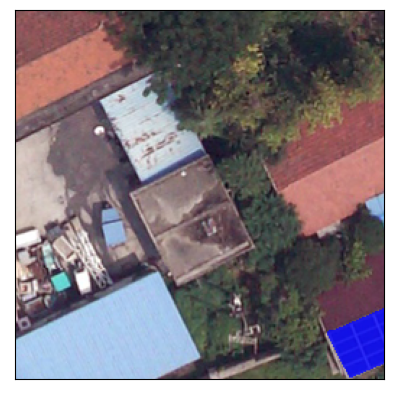

In [11]:
from torchvision.utils import draw_segmentation_masks

drawn_masks = []
for mask in masks:
    drawn_masks.append(draw_segmentation_masks(img, mask, alpha=0.8, colors="blue"))

show(drawn_masks)


In [12]:
from torchvision.ops import masks_to_boxes

boxes = masks_to_boxes(masks)
print(boxes.size())
print(boxes)

torch.Size([1, 4])
tensor([[216., 207., 255., 254.]])


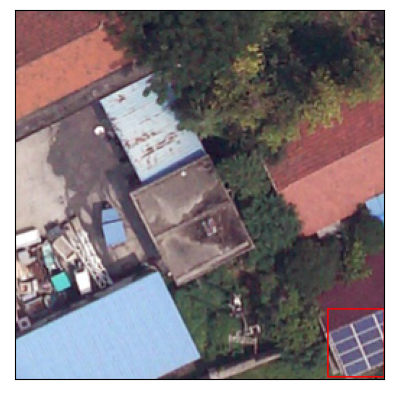

In [13]:
from torchvision.utils import draw_bounding_boxes

drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
show(drawn_boxes)

### Converting bmp to png

In [14]:
images[0]

'../PV01/PV01_Rooftop_Brick/PV01_324942_1203839.bmp'

In [15]:
image_index = 0
for image in images:
    img = Image.open(image)
    img = img.resize((256, 256))
    img.save(f"../PV01/images/{image_index}.png")
    image_index += 1


In [16]:
masks[0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [18]:
images, masks = getFiles(brick, flatConcrete, steelTile)

In [19]:
mask_index = 0
for mask in masks:
    msk = Image.open(mask)
    msk = msk.resize((256, 256))
    msk.save(f"../PV01/masks/{mask_index}.png")
    mask_index += 1

In [20]:
images_path = "../PV01/images"
mask_path = "../PV01/masks"

images = []
masks = []

for root, dirs, files in os.walk(images_path):
    for file in files:
        images.append(os.path.join(root, file))

for root, dirs, files in os.walk(mask_path):
    for file in files:
        masks.append(os.path.join(root, file))


In [21]:
images[:10]


['../PV01/images/513.png',
 '../PV01/images/124.png',
 '../PV01/images/109.png',
 '../PV01/images/259.png',
 '../PV01/images/155.png',
 '../PV01/images/380.png',
 '../PV01/images/386.png',
 '../PV01/images/588.png',
 '../PV01/images/617.png',
 '../PV01/images/420.png']

In [22]:
masks[:10]

['../PV01/masks/513.png',
 '../PV01/masks/124.png',
 '../PV01/masks/109.png',
 '../PV01/masks/259.png',
 '../PV01/masks/155.png',
 '../PV01/masks/380.png',
 '../PV01/masks/386.png',
 '../PV01/masks/588.png',
 '../PV01/masks/617.png',
 '../PV01/masks/420.png']

In [40]:
images = sorted(images, key=lambda x: int(x.split("/")[-1].split(".")[0]))
masks = sorted(masks, key=lambda x: int(x.split("/")[-1].split(".")[0]))

In [41]:
images[:10]

['../PV01/images/0.png',
 '../PV01/images/1.png',
 '../PV01/images/2.png',
 '../PV01/images/3.png',
 '../PV01/images/4.png',
 '../PV01/images/5.png',
 '../PV01/images/6.png',
 '../PV01/images/7.png',
 '../PV01/images/8.png',
 '../PV01/images/9.png']

In [44]:
bbxs = []

for image, mask in zip(images, masks):
    img = read_image(image)
    mask = read_image(mask)
    obj_ids = torch.unique(mask)
    obj_ids = obj_ids[1:]
    masks = mask == obj_ids[:, None, None]

    boxes = masks_to_boxes(masks)
    drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
    bbxs.append(drawn_boxes)



/home/bharathraj/.local/lib/python3.10/site-packages/torchvision/utils.py:210: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


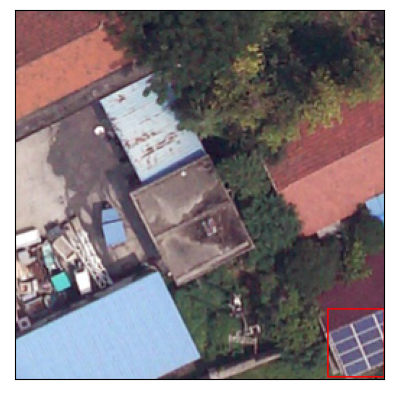

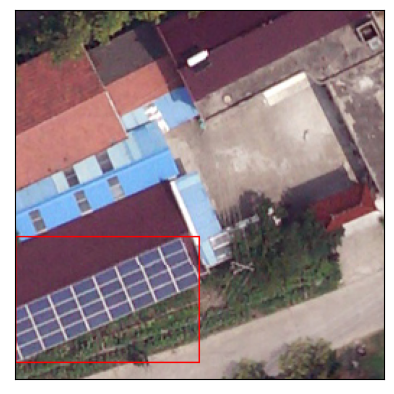

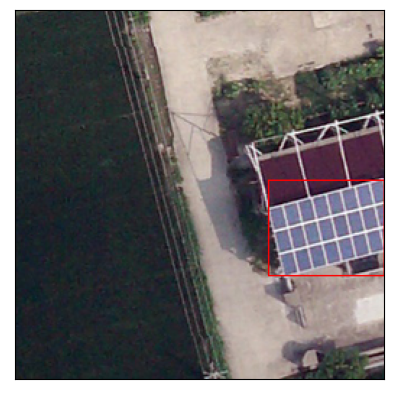

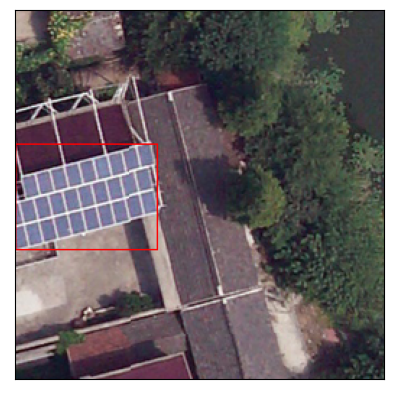

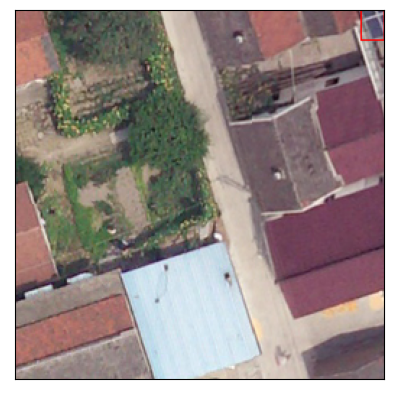

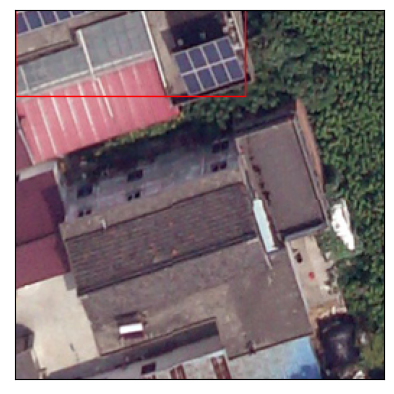

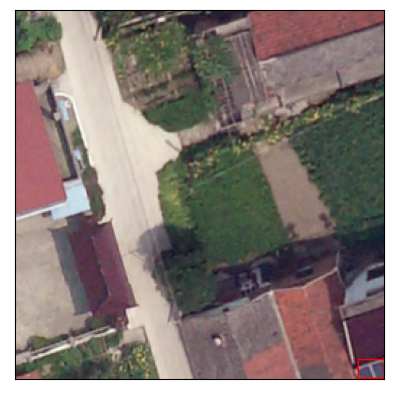

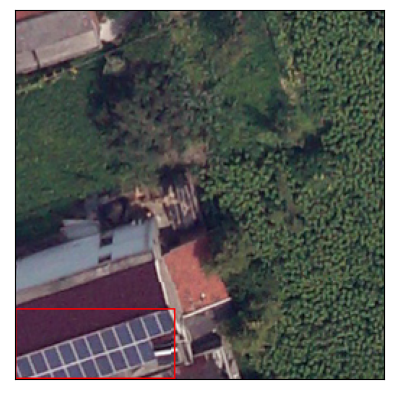

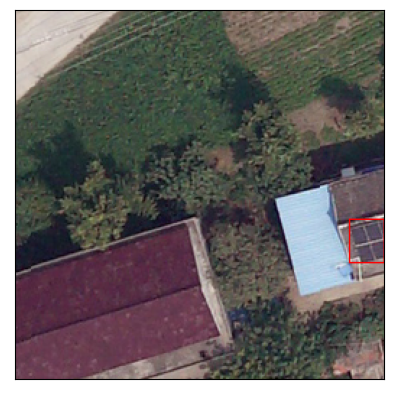

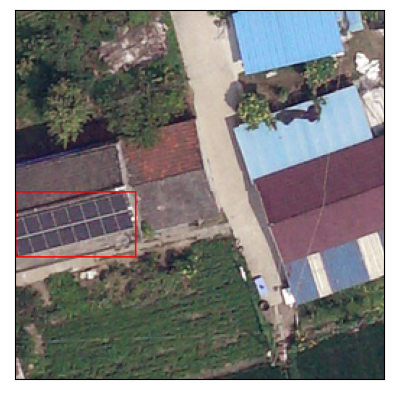

In [47]:
for i in range(10):
    show(bbxs[i])